In [19]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches




In [20]:
#loading data
df=pd.read_excel('minard-data(1).xlsx')
df.head()

LONC  LATC       CITY  LONT  TEMP  DAYS  MON   DAY  LONP  LATP    SURV DIR  \
0  24.0  55.0      Kowno  37.6   0.0   6.0  Oct  18.0  24.0  54.9  340000   A   
1  25.3  54.7      Wilna  36.0   0.0   6.0  Oct  24.0  24.5  55.0  340000   A   
2  26.4  54.4   Smorgoni  33.2  -9.0  16.0  Nov   9.0  25.5  54.5  340000   A   
3  26.8  54.3  Molodexno  32.0 -21.0   5.0  Nov  14.0  26.0  54.7  320000   A   
4  27.7  55.2  Gloubokoe  29.2 -11.0  10.0  NaN   NaN  27.0  54.8  300000   A   

   DIV  
0    1  
1    1  
2    1  
3    1  
4    1

In [21]:
#checking NaN values per column
df.isna().sum(axis=0)

LONC    28
LATC    28
CITY    28
LONT    39
TEMP    39
DAYS    39
MON     40
DAY     40
LONP     0
LATP     0
SURV     0
DIR      0
DIV      0
dtype: int64

we cannot use .dropna() here because it will remove rows with valuable data

Columns 1-3 are longitude, latitude and names of cities <br>
Columns 4-8: longitude, temperature, dates (during the march home only)<br>
Columns 9-14: longitude, latitude, number of survivors, direction of travel (A=towards theattack/R=return journey), division of army<br>
<br>
Since the data is divided as such, i am going to split the data so we could manipulate and use the data respectively to plot the visualizations. 

In [22]:
temp_cols=['LONT','TEMP','DAYS','MON','DAY']
city_cols=['LONC','LATC','CITY']
survivor_cols=['LONP','LATP','SURV','DIR','DIV']
temp_df=df[temp_cols].copy().dropna()
city_df=df[city_cols].copy().dropna()
survivor_df=df[survivor_cols].copy().dropna()



We are going to plot two graphs, one visualizing the flow of the troops, the other will visualize the temperature.

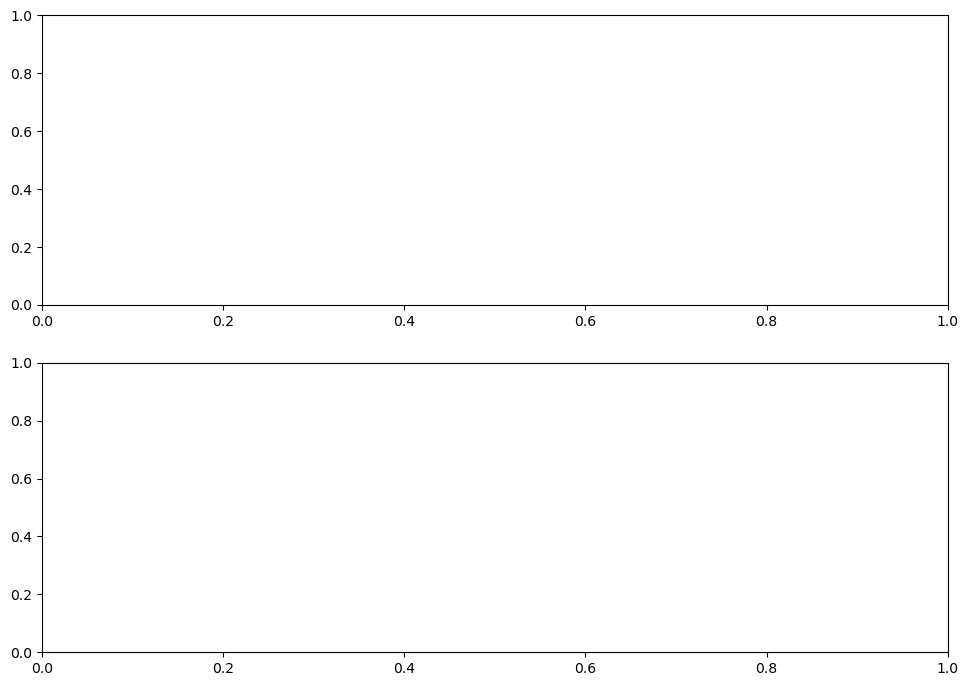

In [23]:
fig,axs=plt.subplots(figsize=(11.69, 8.27),nrows=2)
plt.show()

<AxesSubplot:>

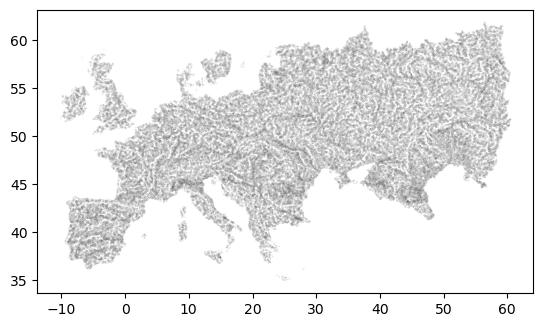

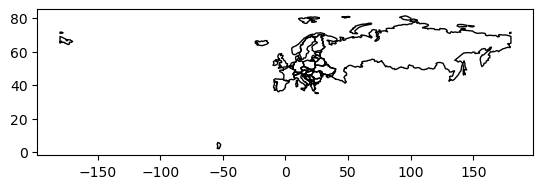

In [24]:
europe_map = gpd.read_file(r'C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\110m_cultural\ne_110m_admin_0_countries.shp')
rivers_europe = gpd.read_file(r"C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\rivers_europe_37253\rivers_europe_37253.shp")
rivers_europe.plot(alpha=0.1,facecolor='black',edgecolor='black')
europe_map = europe_map[europe_map.CONTINENT == 'Europe']
europe_map.plot(cmap='Set3',edgecolor='black',facecolor='none')



we will use the this europe map and the flow of the rivers as the background and later zoom into the appropriate area on the map. The europe_map data was obtained from Natural Earth. And the river dataset from AQUASTAT. 

In [25]:
rivers_europe.plot(ax=axs[0], alpha=0.1,facecolor='black',edgecolor='black')
europe_map.plot(ax=axs[0],cmap='Set3',edgecolor='black',facecolor='none',alpha=0.5)
# axs[0].set_xlim(23,38.2)
# axs[0].set_ylim(53.3,57)


<AxesSubplot:>

Now, i will write the code to add the line segments on to the graph. I will create a function so tht it is reusable.

In [26]:
def getSegment(num_survivors,long,lat,col,txt,div1=False,div2=False,handles=[]):
    if div1:
        thickness = num_survivors/10500
    elif div2:
        thickness = num_survivors/9500
    else:    
        thickness = num_survivors/7000
    points = np.array([long, lat]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, linewidth= thickness, color=col, capstyle='round', zorder=2, label=txt)
    # handles=+lc.get_segments()
    return lc
    

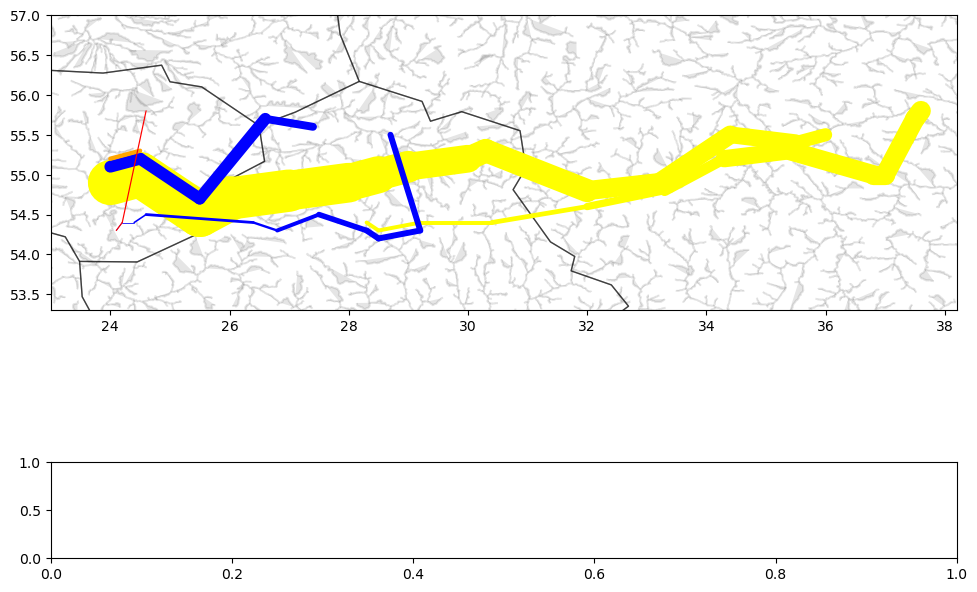

In [27]:
fig,axs=plt.subplots(figsize=(11.69, 8.27),nrows=2,gridspec_kw={'height_ratios': [5, 1]})

europe_map = gpd.read_file(r'C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\110m_cultural\ne_110m_admin_0_countries.shp')
europe_map = europe_map[europe_map.CONTINENT == 'Europe']
rivers_europe = gpd.read_file(r"C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\rivers_europe_37253\rivers_europe_37253.shp")
rivers_europe.plot(ax=axs[0], alpha=0.1,facecolor='black',edgecolor='black')
europe_map.plot(ax=axs[0],cmap='Set3',edgecolor='black',facecolor='none',alpha=0.5)
axs[0].set_xlim(23,38.2)
axs[0].set_ylim(53.3,57)


#attacking
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)].SURV,
           survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)].LONP,
           survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)].LATP,'yellow','Attack division 1',True))

axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)].SURV,
           survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)].LONP,
           survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)].LATP,'blue','Attack division 2'))
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)].SURV,
           survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)].LONP,
           survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)].LATP,'orange','Attack division 3'))

#return
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LATP,'yellow','Return division 1'))

axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LATP,'blue','Return division 2'))
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LATP,'red','Return divisioniv 3'))
plt.show()

the graph above is a test graph, based on that, we can see that i have to add the last point of the return division 1 in the division 1 attack line segment.

In [28]:
div1_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].iloc[0:1,:]])
div3_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].iloc[0:1,:]])
div2_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].iloc[0:1,:]])



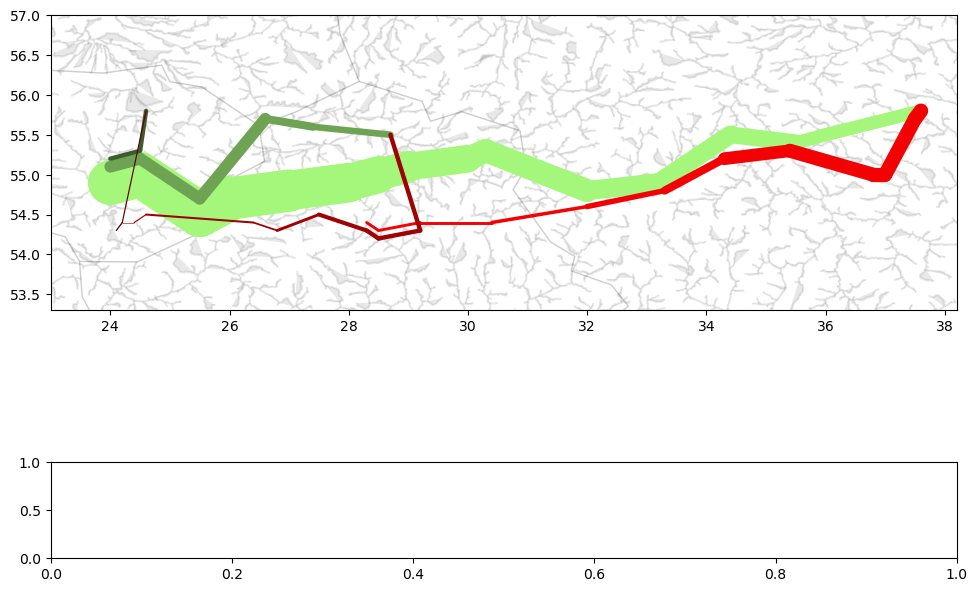

In [29]:
fig,axs=plt.subplots(figsize=(11.69, 8.27),nrows=2,gridspec_kw={'height_ratios': [5, 1]})

europe_map = gpd.read_file(r'C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\110m_cultural\ne_110m_admin_0_countries.shp')
europe_map = europe_map[europe_map.CONTINENT == 'Europe']
rivers_europe = gpd.read_file(r"C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\rivers_europe_37253\rivers_europe_37253.shp")
rivers_europe.plot(ax=axs[0], alpha=0.09,facecolor='black',edgecolor='black')
europe_map.plot(ax=axs[0],edgecolor='black',alpha=0.1,facecolor='none')
axs[0].set_xlim(23,38.2)
axs[0].set_ylim(53.3,57)

#attacking
div1_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].iloc[0:1,:]])
div3_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].iloc[0:1,:]])
div2_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].iloc[0:1,:]])

axs[0].add_collection(getSegment(div1_attack.SURV,
           div1_attack.LONP,
           div1_attack.LATP,'#a5f77c','Attack div 1',True))

axs[0].add_collection(getSegment(div2_attack.SURV,
           div2_attack.LONP,
           div2_attack.LATP,'#6da352','Attack div 2'))
axs[0].add_collection(getSegment(div3_attack.SURV,
           div3_attack.LONP,
           div3_attack.LATP,'#3d5c2e','Attack div 3'))

#return
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LATP,'#f20202','Attack div 1',div2=True))

axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LATP,'#9e0202','Attack div 2',div2=True))
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LATP,'#5e0101','Attack div 3'))
plt.show()

Now we will add the city names and the survivor counts

In [30]:
geo_city = gpd.GeoDataFrame(city_df[[ 'LATC','CITY', 'LONC']], geometry=gpd.points_from_xy(city_df.LONC, city_df.LATC))
geo_survivor=gpd.GeoDataFrame(survivor_df[[ 'LATP','SURV', 'LONP','DIR','DIV']], geometry=gpd.points_from_xy(survivor_df.LONP, survivor_df.LATP))

In [31]:
geo_city.head()

LATC       CITY  LONC           geometry
0  55.0      Kowno  24.0      POINT (24 55)
1  54.7      Wilna  25.3  POINT (25.3 54.7)
2  54.4   Smorgoni  26.4  POINT (26.4 54.4)
3  54.3  Molodexno  26.8  POINT (26.8 54.3)
4  55.2  Gloubokoe  27.7  POINT (27.7 55.2)

In [32]:
geo_survivor=geo_survivor.drop_duplicates(subset=['SURV'], keep='first') #repeated survivor counts in the column
geo_survivor


LATP    SURV  LONP DIR  DIV           geometry
0   54.9  340000  24.0   A    1    POINT (24 54.9)
3   54.7  320000  26.0   A    1    POINT (26 54.7)
4   54.8  300000  27.0   A    1    POINT (27 54.8)
5   54.9  280000  28.0   A    1    POINT (28 54.9)
6   55.0  240000  28.5   A    1    POINT (28.5 55)
7   55.1  210000  29.0   A    1    POINT (29 55.1)
8   55.2  180000  30.0   A    1    POINT (30 55.2)
9   55.3  175000  30.3   A    1  POINT (30.3 55.3)
10  54.8  145000  32.0   A    1    POINT (32 54.8)
11  54.9  140000  33.2   A    1  POINT (33.2 54.9)
12  55.5  127100  34.4   A    1  POINT (34.4 55.5)
13  55.4  100000  35.5   A    1  POINT (35.5 55.4)
16  55.7   98000  37.5   R    1  POINT (37.5 55.7)
17  55.0   97000  37.0   R    1      POINT (37 55)
18  55.0   96000  36.8   R    1    POINT (36.8 55)
19  55.3   87000  35.4   R    1  POINT (35.4 55.3)
20  55.2   55000  34.3   R    1  POINT (34.3 55.2)
21  54.8   37000  33.3   R    1  POINT (33.3 54.8)
22  54.6   24000  32.0   R    1    POINT (32 54.6)
23  54.4   20000  30.4   R    1  POINT (30.4 54.4)
27  55.1   60000  24.0   A    2    POINT (24 55.1)
30  55.7   40000  26.6   A    2  POINT (26.6 55.7)
31  55.6   33000  27.4   A    2  POINT (27.4 55.6)
32  55.5   30000  28.7   R    2  POINT (28.7 55.5)
35  54.3   28000  28.3   R    2  POINT (28.3 54.3)
37  54.3   12000  26.8   R    2  POINT (26.8 54.3)
38  54.4   14000  26.4   R    2  POINT (26.4 54.4)
39  54.5    8000  24.6   R    2  POINT (24.6 54.5)
40  54.4    4000  24.4   R    2  POINT (24.4 54.4)
43  55.2   22000  24.0   A    3    POINT (24 55.2)
45  55.8    6000  24.6   R    3  POINT (24.6 55.8)

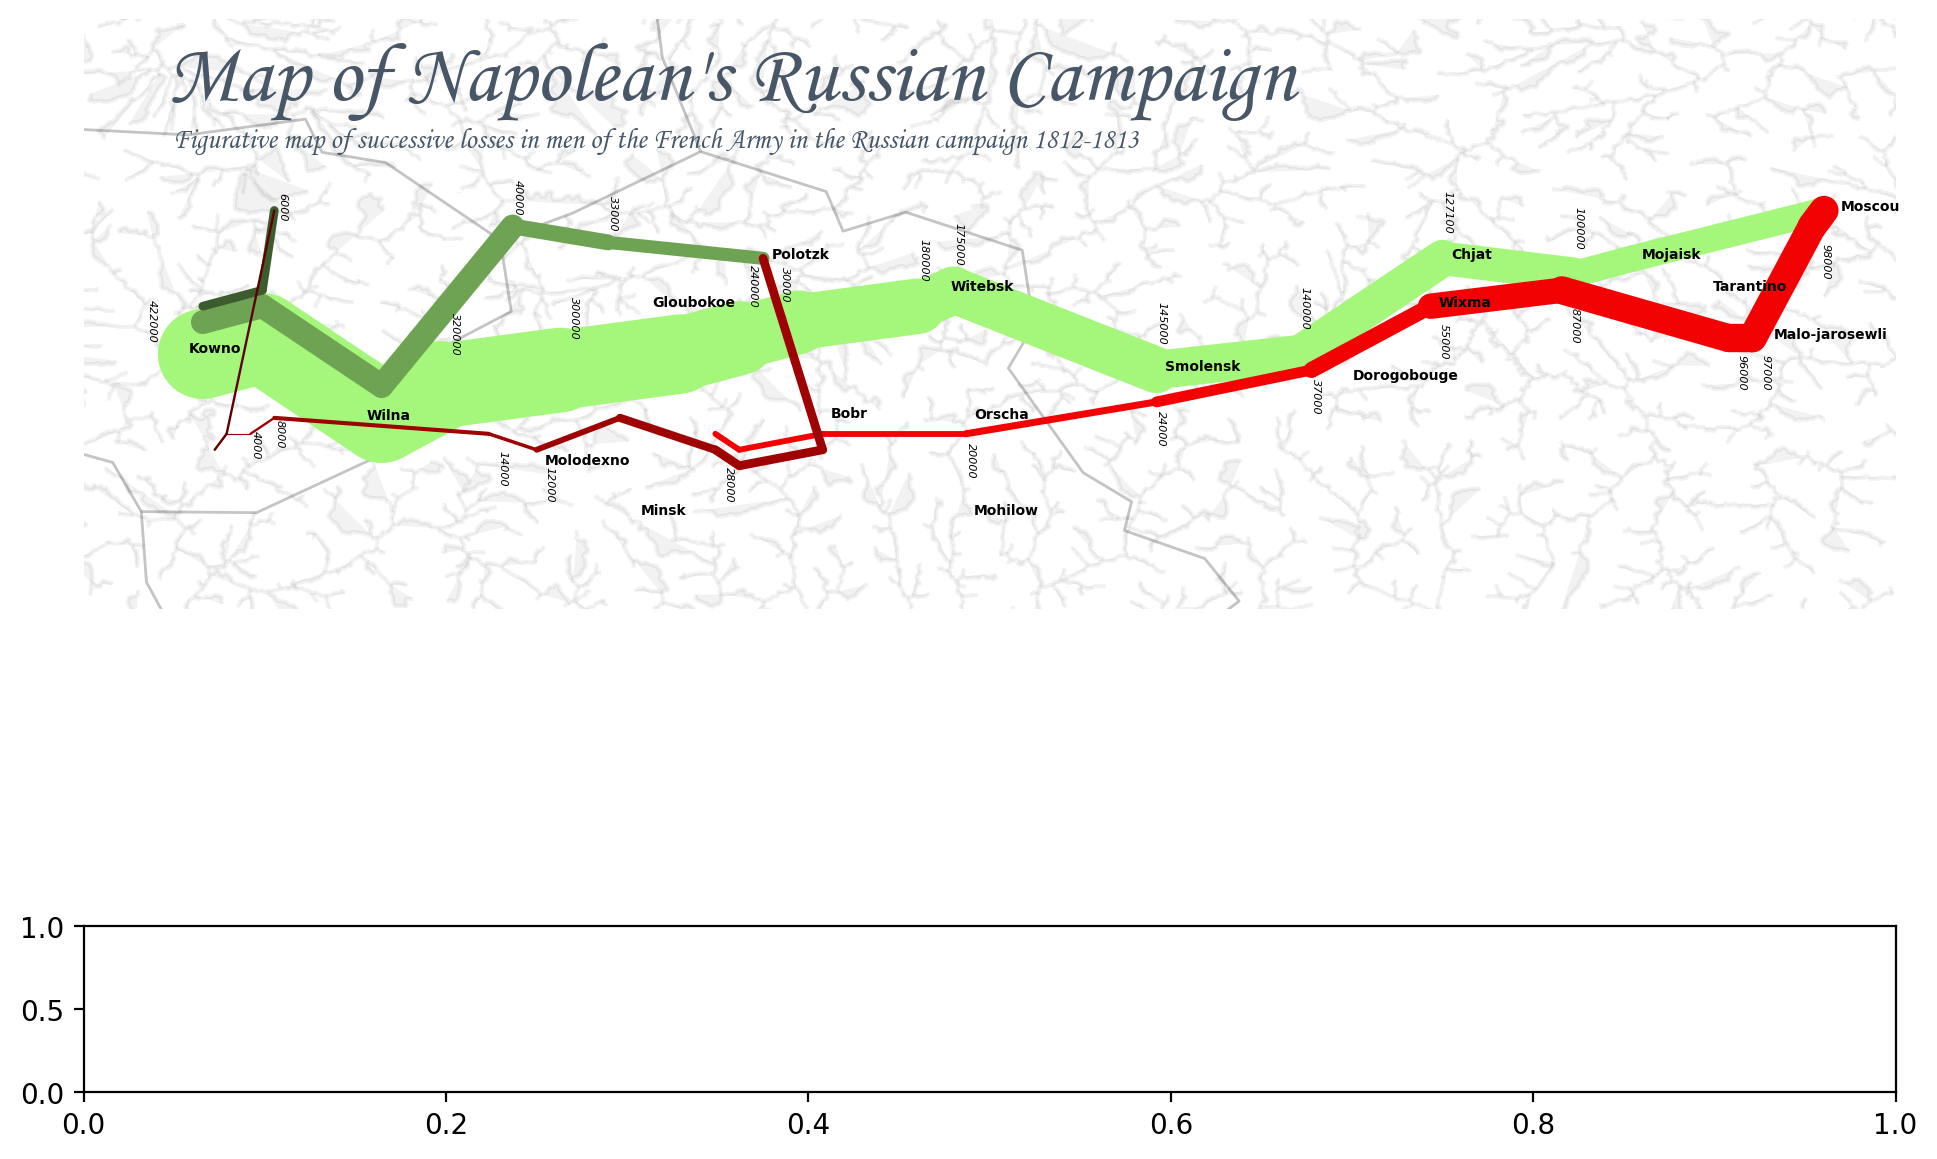

In [33]:
fig,axs=plt.subplots(figsize=(11.69, 8.27),dpi=200,nrows=2,gridspec_kw={'height_ratios': [6, 1]})

europe_map = gpd.read_file(r'C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\110m_cultural\ne_110m_admin_0_countries.shp')
europe_map = europe_map[europe_map.CONTINENT == 'Europe']
rivers_europe = gpd.read_file(r"C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\rivers_europe_37253\rivers_europe_37253.shp")
rivers_europe.plot(ax=axs[0], alpha=0.05,facecolor='black',edgecolor='black')
europe_map.plot(ax=axs[0],edgecolor='black',alpha=0.12,facecolor='none')
axs[0].set_xlim(23,38.2)
axs[0].set_ylim(53.3,57)

#attacking
div1_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].iloc[0:1,:]])
div3_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].iloc[0:1,:]])
div2_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].iloc[0:1,:]])

axs[0].add_collection(getSegment(div1_attack.SURV,
           div1_attack.LONP,
           div1_attack.LATP,'#a5f77c','Attack div 1',True))

axs[0].add_collection(getSegment(div2_attack.SURV,
           div2_attack.LONP,
           div2_attack.LATP,'#6da352','Attack div 2'))
axs[0].add_collection(getSegment(div3_attack.SURV,
           div3_attack.LONP,
           div3_attack.LATP,'#3d5c2e','Attack div 3'))

#return
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LATP,'#f20202','Attack div 1',div2=True))

axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LATP,'#9e0202','Attack div 2',div2=True))
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LATP,'#5e0101','Attack div 3'))

#adding cities
fsc=5
ncity=~geo_city.CITY.isin(['Studienska', 'Smorgoni','Molodexno','Moscou','Bobr','Wilna','Kowno','Dorogobouge','Malo-jarosewli'])
axs[0].annotate('Molodexno', xy=(geo_city[geo_city.CITY=='Molodexno'].geometry.x, geo_city[geo_city.CITY=='Molodexno'].geometry.y),
                 xytext=(3, -5), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Moscou', xy=(geo_city[geo_city.CITY=='Moscou'].geometry.x, geo_city[geo_city.CITY=='Moscou'].geometry.y),
                 xytext=(6, 0), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Bobr', xy=(geo_city[geo_city.CITY=='Bobr'].geometry.x, geo_city[geo_city.CITY=='Bobr'].geometry.y),
                 xytext=(3, 6), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Wilna', xy=(geo_city[geo_city.CITY=='Wilna'].geometry.x, geo_city[geo_city.CITY=='Wilna'].geometry.y),
                 xytext=(3, -12), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Kowno', xy=(geo_city[geo_city.CITY=='Kowno'].geometry.x, geo_city[geo_city.CITY=='Kowno'].geometry.y),
                 xytext=(-5, -5), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Dorogobouge', xy=(geo_city[geo_city.CITY=='Dorogobouge'].geometry.x, geo_city[geo_city.CITY=='Dorogobouge'].geometry.y),
                 xytext=(19, -9), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Malo-jarosewli', xy=(geo_city[geo_city.CITY=='Malo-jarosewli'].geometry.x, geo_city[geo_city.CITY=='Malo-jarosewli'].geometry.y),
                 xytext=(29, 0), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
for x, y, label in zip(geo_city[ncity].geometry.x, geo_city[ncity].geometry.y, geo_city[ncity].CITY):
    axs[0].annotate(label, xy=(x, y),
                 xytext=(3, 0), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
    
fs=4
#count dir=A div=1
adiv1a=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (~geo_survivor.SURV.isin([280000,210000,320000,300000,240000,340000]))
for x, y, label in zip(geo_survivor[adiv1a].geometry.x, geo_survivor[adiv1a].geometry.y, geo_survivor[adiv1a].SURV):
    axs[0].annotate(label, xy=(x, y),
                 xytext=(0, 10), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
adiv1b=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([320000,300000,240000]))
for x, y, label in zip(geo_survivor[adiv1b].geometry.x, geo_survivor[adiv1b].geometry.y, geo_survivor[adiv1b].SURV):
    axs[0].annotate(label, xy=(x, y),
                 xytext=(3, 12), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
adiv1c=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([340000]))
for x, y in zip(geo_survivor[adiv1c].geometry.x, geo_survivor[adiv1c].geometry.y):
    axs[0].annotate('422000', xy=(x, y),
                 xytext=(-20, 5), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
    
#count dir=A div=2
adiv2a=(geo_survivor.DIR=='A') & (geo_survivor.DIV==2) & (~geo_survivor.SURV.isin([60000]))
for x, y, label in zip(geo_survivor[adiv2a].geometry.x, geo_survivor[adiv2a].geometry.y, geo_survivor[adiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, 5), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
#count dir=R div=1
rdiv2a=(geo_survivor.DIR=='R') & (geo_survivor.DIV==1) & (~geo_survivor.SURV.isin([20000,24000,37000]))
for x, y, label in zip(geo_survivor[rdiv2a].geometry.x, geo_survivor[rdiv2a].geometry.y, geo_survivor[rdiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(3, -18), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2a=(geo_survivor.DIR=='R') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([20000,24000,37000]))
for x, y, label in zip(geo_survivor[rdiv2a].geometry.x, geo_survivor[rdiv2a].geometry.y, geo_survivor[rdiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, -15), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
#count dir=R div=2
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (~geo_survivor.SURV.isin([30000,4000,8000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(3, -18), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([30000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(6, -15), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([4000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, -8), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([8000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, -10), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
#count dir=R div=3
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==3) #& (~geo_survivor.SURV.isin([30000,4000,8000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(1, -3), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)

axs[0].axis('off')

axs[0].annotate("Map of Napolean's Russian Campaign", (23.7, 56.5),
             color='#475768', fontsize=30, fontname='Monotype Corsiva',fontweight='heavy')
axs[0].annotate("Figurative map of successive losses in men of the French Army in the Russian campaign 1812-1813",
             (23.75, 56.2), color='#475768', fontsize=10, weight='bold',fontname='Monotype Corsiva')


plt.show()

Now that i am done with the first graph, i will code the temperature graph

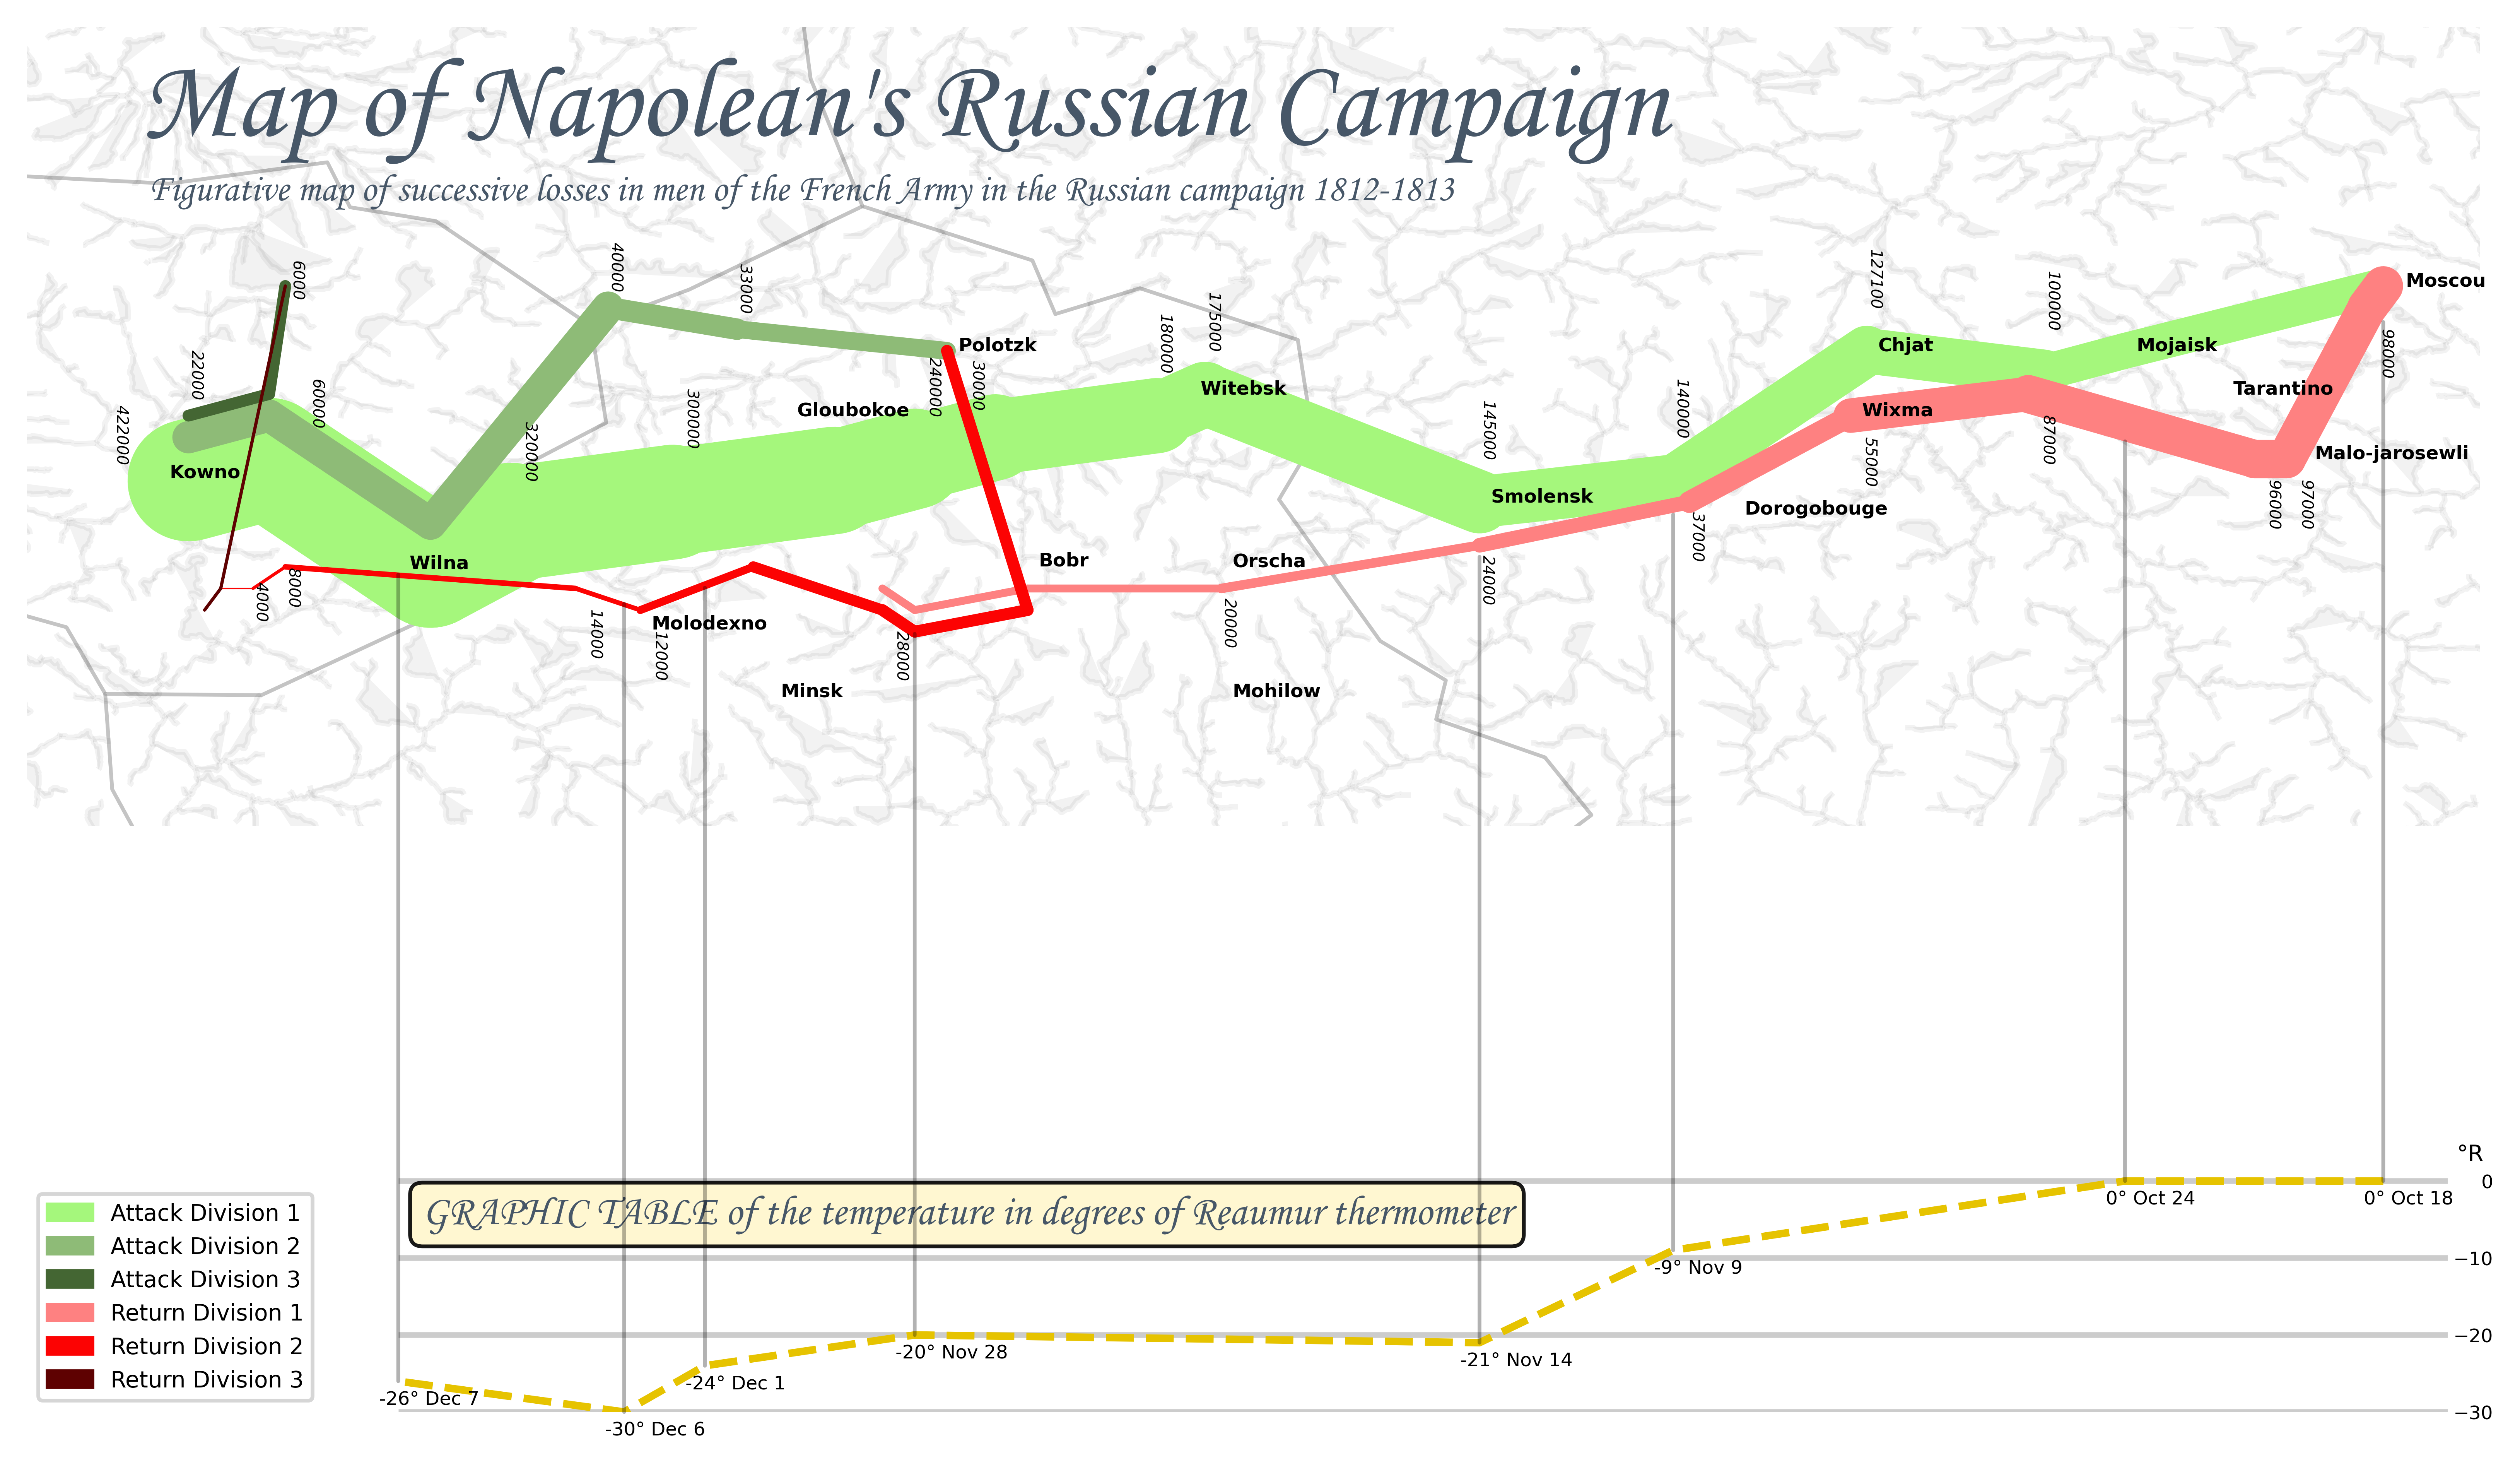

In [34]:
fig,axs=plt.subplots(figsize=(11.69, 8.27),dpi=700,nrows=2,gridspec_kw={'height_ratios': [6, 1]})

europe_map = gpd.read_file(r'C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\110m_cultural\ne_110m_admin_0_countries.shp')
europe_map = europe_map[europe_map.CONTINENT == 'Europe']
rivers_europe = gpd.read_file(r"C:\Users\daims\Desktop\Data Visualization\assignment 1\1.1\rivers_europe_37253\rivers_europe_37253.shp")
rivers_europe.plot(ax=axs[0], alpha=0.05,facecolor='black',edgecolor='black')
europe_map.plot(ax=axs[0],edgecolor='black',alpha=0.12,facecolor='none')
axs[0].set_xlim(23,38.2)
axs[0].set_ylim(53.3,57)

#attacking
div1_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==1)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].iloc[0:1,:]])
div3_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==3)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].iloc[0:1,:]])
div2_attack = pd.concat([survivor_df[(survivor_df.DIR=='A')&(survivor_df.DIV==2)],survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].iloc[0:1,:]])
a3,a2,a1='#446633','#8ebb77','#a5f77c'
r1,r2,r3='#fe8181','#fc0303','#5e0101'
axs[0].add_collection(getSegment(div1_attack.SURV,
           div1_attack.LONP,
           div1_attack.LATP,a1,'Attack div 1',True))

axs[0].add_collection(getSegment(div2_attack.SURV,
           div2_attack.LONP,
           div2_attack.LATP,a2,'Attack div 2'))
axs[0].add_collection(getSegment(div3_attack.SURV,
           div3_attack.LONP,
           div3_attack.LATP,a3,'Attack div 3'))

#return
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==1)].LATP,r1,'Attack div 1',div2=True))

axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==2)].LATP,r2,'Attack div 2',div2=True))
axs[0].add_collection(getSegment(survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].SURV,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LONP,
           survivor_df[(survivor_df.DIR=='R')&(survivor_df.DIV==3)].LATP,r3,'Attack div 3'))

#adding cities
fsc=5
ncity=~geo_city.CITY.isin(['Studienska', 'Smorgoni','Molodexno','Moscou','Bobr','Wilna','Kowno','Dorogobouge','Malo-jarosewli'])
axs[0].annotate('Molodexno', xy=(geo_city[geo_city.CITY=='Molodexno'].geometry.x, geo_city[geo_city.CITY=='Molodexno'].geometry.y),
                 xytext=(3, -5), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Moscou', xy=(geo_city[geo_city.CITY=='Moscou'].geometry.x, geo_city[geo_city.CITY=='Moscou'].geometry.y),
                 xytext=(6, 0), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Bobr', xy=(geo_city[geo_city.CITY=='Bobr'].geometry.x, geo_city[geo_city.CITY=='Bobr'].geometry.y),
                 xytext=(3, 6), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Wilna', xy=(geo_city[geo_city.CITY=='Wilna'].geometry.x, geo_city[geo_city.CITY=='Wilna'].geometry.y),
                 xytext=(3, -12), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Kowno', xy=(geo_city[geo_city.CITY=='Kowno'].geometry.x, geo_city[geo_city.CITY=='Kowno'].geometry.y),
                 xytext=(-5, -5), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Dorogobouge', xy=(geo_city[geo_city.CITY=='Dorogobouge'].geometry.x, geo_city[geo_city.CITY=='Dorogobouge'].geometry.y),
                 xytext=(19, -9), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
axs[0].annotate('Malo-jarosewli', xy=(geo_city[geo_city.CITY=='Malo-jarosewli'].geometry.x, geo_city[geo_city.CITY=='Malo-jarosewli'].geometry.y),
                 xytext=(29, 0), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
for x, y, label in zip(geo_city[ncity].geometry.x, geo_city[ncity].geometry.y, geo_city[ncity].CITY):
    axs[0].annotate(label, xy=(x, y),
                 xytext=(3, 0), textcoords="offset points", zorder=100, fontsize=fsc, weight='bold')
    
fs=4.2
#count dir=A div=1
adiv1a=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (~geo_survivor.SURV.isin([280000,210000,320000,300000,240000,340000]))
for x, y, label in zip(geo_survivor[adiv1a].geometry.x, geo_survivor[adiv1a].geometry.y, geo_survivor[adiv1a].SURV):
    axs[0].annotate(label, xy=(x, y),
                 xytext=(0, 12), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
adiv1b=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([320000,240000]))
for x, y, label in zip(geo_survivor[adiv1b].geometry.x, geo_survivor[adiv1b].geometry.y, geo_survivor[adiv1b].SURV):
    axs[0].annotate(label, xy=(x, y),
                 xytext=(3, 12), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
adiv1c=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([340000]))
for x, y in zip(geo_survivor[adiv1c].geometry.x, geo_survivor[adiv1c].geometry.y):
    axs[0].annotate('422000', xy=(x, y),
                 xytext=(-20, 5), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
adiv1c=(geo_survivor.DIR=='A') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([300000]))
for x, y in zip(geo_survivor[adiv1c].geometry.x, geo_survivor[adiv1c].geometry.y):
    axs[0].annotate('300000', xy=(x, y),
                 xytext=(3, 15), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
    
#count dir=A div=2
adiv2a=(geo_survivor.DIR=='A') & (geo_survivor.DIV==2) & (~geo_survivor.SURV.isin([60000]))
for x, y, label in zip(geo_survivor[adiv2a].geometry.x, geo_survivor[adiv2a].geometry.y, geo_survivor[adiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, 5), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
adiv2a=(geo_survivor.DIR=='A') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([60000]))
for x, y, label in zip(geo_survivor[adiv2a].geometry.x, geo_survivor[adiv2a].geometry.y, geo_survivor[adiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(32, 3), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)

#count dir=A div=3
adiv2a=(geo_survivor.DIR=='A') & (geo_survivor.DIV==3)# & (~geo_survivor.SURV.isin([60000]))
for x, y, label in zip(geo_survivor[adiv2a].geometry.x, geo_survivor[adiv2a].geometry.y, geo_survivor[adiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, 5), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
#count dir=R div=1
rdiv2a=(geo_survivor.DIR=='R') & (geo_survivor.DIV==1) & (~geo_survivor.SURV.isin([20000,24000,37000]))
for x, y, label in zip(geo_survivor[rdiv2a].geometry.x, geo_survivor[rdiv2a].geometry.y, geo_survivor[rdiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(3, -18), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2a=(geo_survivor.DIR=='R') & (geo_survivor.DIV==1) & (geo_survivor.SURV.isin([20000,24000,37000]))
for x, y, label in zip(geo_survivor[rdiv2a].geometry.x, geo_survivor[rdiv2a].geometry.y, geo_survivor[rdiv2a].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, -15), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
#count dir=R div=2
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (~geo_survivor.SURV.isin([30000,4000,8000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(3, -18), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([30000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(6, -15), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([4000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, -8), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==2) & (geo_survivor.SURV.isin([8000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(0, -10), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)
    
#count dir=R div=3
rdiv2b=(geo_survivor.DIR=='R') & (geo_survivor.DIV==3) #& (~geo_survivor.SURV.isin([30000,4000,8000]))
for x, y, label in zip(geo_survivor[rdiv2b].geometry.x, geo_survivor[rdiv2b].geometry.y, geo_survivor[rdiv2b].SURV):
    axs[0].annotate(label, xy=(x, y),
                xytext=(1, -3), textcoords="offset points", zorder=3, fontsize=fs, fontstyle='italic',rotation=-90)

axs[0].axis('off')

axs[0].annotate("Map of Napolean's Russian Campaign", (23.7, 56.5),
             color='#475768', fontsize=30, fontname='Monotype Corsiva',fontweight='heavy')
axs[0].annotate("Figurative map of successive losses in men of the French Army in the Russian campaign 1812-1813",
             (23.75, 56.2), color='#475768', fontsize=10, weight='bold',fontname='Monotype Corsiva')


#temperature graph#########################33
for val in (0, -10, -20, -30):
    axs[1].hlines(val, 25.3, 38, alpha=0.2, color='black')

axs[1].set_xlim(23,38.2)
axs[1].set_ylim(-30,2)

offset=-25
con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[0,0],temp_df[['LONT',"TEMP"]].iloc[0,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[0,0],89-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[1,0],temp_df[['LONT',"TEMP"]].iloc[1,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[1,0],73.5-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[2,0],temp_df[['LONT',"TEMP"]].iloc[2,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[2,0],64-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[3,0],temp_df[['LONT',"TEMP"]].iloc[3,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[3,0],58.5-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[4,0],temp_df[['LONT',"TEMP"]].iloc[4,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[4,0],48.5-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[5,0],temp_df[['LONT',"TEMP"]].iloc[5,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[5,0],54.5-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[6,0],temp_df[['LONT',"TEMP"]].iloc[6,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[6,0],52.4-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

con = ConnectionPatch(xyA=(temp_df[['LONT',"TEMP"]].iloc[7,0],temp_df[['LONT',"TEMP"]].iloc[7,1]), coordsA=axs[1].transData,
                          xyB=(temp_df[['LONT',"TEMP"]].iloc[7,0],56.2-offset), coordsB=axs[1].transData,
                          arrowstyle="-", shrinkB=5, alpha=0.3)
fig.add_artist(con)

for i,row in enumerate(temp_df.iterrows()):
    long, temp, mon, day = row[1][['LONT','TEMP', 'MON', 'DAY']].values
    axs[1].annotate(f"{int(temp)}° {mon} {int(day)}", (long, temp), xytext=(long-0.12, temp-3),fontsize=5)

axs[1].plot(temp_df.LONT, temp_df.TEMP, c='#e6c300', lw=2, linestyle='--')

    
axs[0].axis('off')
axs[1].yaxis.tick_right()
for tick in axs[1].yaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs[1].set_ylabel("°R",rotation=00, fontsize=6)
axs[1].yaxis.set_label_coords(0.996, 1)
axs[1].set_xticks([])
axs[1].set_yticks([0, -10, -20, -30])
axs[1].tick_params(axis='both', which='both',length=0)
axs[1].yaxis.set_tick_params(labelsize=5)
axs[1].annotate("GRAPHIC TABLE of the temperature in degrees of Reaumur thermometer", (25.45, -5.5),
             bbox= dict(facecolor='#fff7cc', alpha=0.9, boxstyle='round'),  
         weight='bold',color='#475768', fontsize=11, fontname='Monotype Corsiva')

plt.box(False)

#legend
green_patch1 = mpatches.Patch(color=a1, label='Attack Division 1')
green_patch2 = mpatches.Patch(color=a2, label='Attack Division 2')
green_patch3 = mpatches.Patch(color=a3, label='Attack Division 3')
red_patch1 = mpatches.Patch(color=r1, label='Return Division 1')
red_patch2 = mpatches.Patch(color=r2, label='Return Division 2')
red_patch3 = mpatches.Patch(color=r3, label='Return Division 3')


axs[1].legend( handles=[green_patch1,green_patch2,green_patch3,red_patch1,
                        red_patch2,red_patch3],ncol=1, loc='lower left', frameon=True, fontsize=6)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()